Banks are eager to retain as many active customers as possible. Naturally they are curious to know whether their client base needs are met or whether their clients plan to leave the company. If the bank suspects that their client would potentially lean toward another company, the bank can take measures to convince the client to stay (targeted marketing campaign, more personal attitude etc.).

**Aim of this notebook is to find the most accurate and precise model** to predict, which clients (test data) will stay and which are hesitant and might plan to leave the company. We are using dataset of bank clients (10000 rows) with attributes specified below. Let's jump right into it! 

**Dataset has following attributes:**
* Rownumber: Unique ID for every row
* CustomerID: Unique ID for every client
* Surname: Client's surname
* CreditScore: Client's credit score
* Geography: Country of client's origin
* Gender: Client's gender
* Age: Client's age
* Tenure: Number of years for which the client has been with the bank
* Balance: Client's balance on account
* NumOfProducts: Number of client's products
* HasCrCard: Flag whether client has credit card or not 
* IsActiveMember: Flag whether client is active member of bank or not 
* EstimatedSalary: Client's annual estimated salary in euros
* **Exited: Target variable, flag, whether client left the bank or not**

### Importing the libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#number of rows and attributes
dataset.shape

(10000, 14)

In [5]:
#names of all present attributes in the dataset
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#datatypes of all present attributes in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#number of distinct elements in each attribute
dataset.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#statistic metrics for continuous variables without scientific notation
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Cleaning dataset

In [9]:
#check for missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#drop redundant attributes
dataset = dataset.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
#check, whether there are duplicate customers
dataset.duplicated().sum()

0

## Plotting Count for Qualities

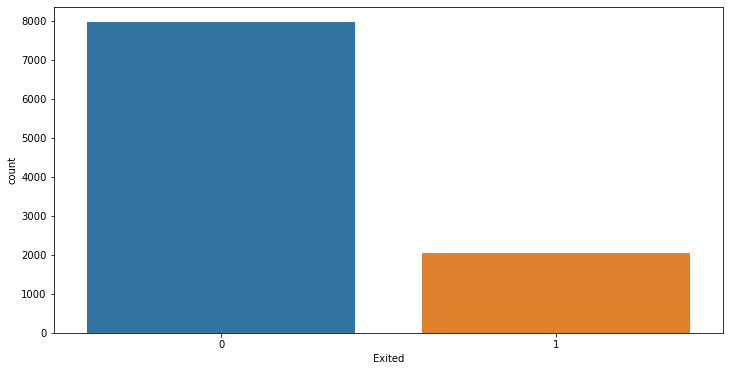

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset,x="Exited");

## Some BoxPlots

In [13]:
def boxPlotter(columnName):
        sns.catplot(x="Exited", y=columnName, data=dataset, kind="box");

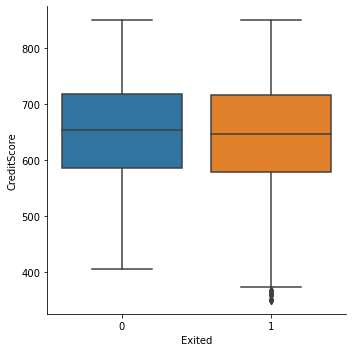

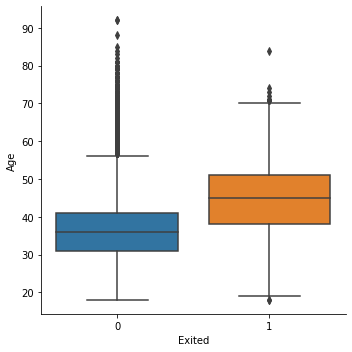

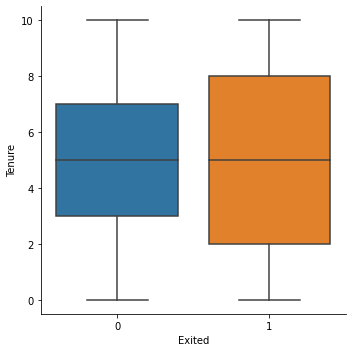

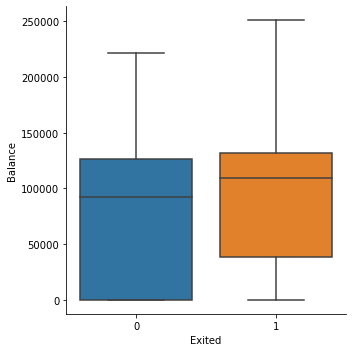

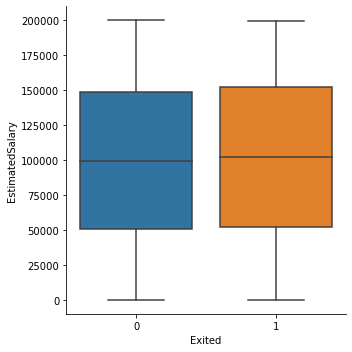

In [14]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for column in cols:
    boxPlotter(column)

From above Plots we can conclude that:-
1. There is no significant difference in credit score distribution between customers which are churned or not.
1. The older customers are churning more than younger ones.
1. Bank is loosing customers with significant bank balance.
1. Estimated Salary does not have a significant on the likelihood to churn.
Interestingly, majority of customers that churned are those with credit cards but this can be a coincidence as majority of customers have credit cards.
Unsurprisingly the inactive members have a greater churn and the overall proportion of inactive members is also very high.

## Correlation Plot
Analyzing relationships between variables**

We would also like to check, whether there are any significant (<= -0.70, >= 0.70) correlations between all features. The highest correlations are between NumOfProducts and Balance (-0.30) and also between Age and Exited (0.29). Nevertheless, it is not enough to consider there relations statistically significant.

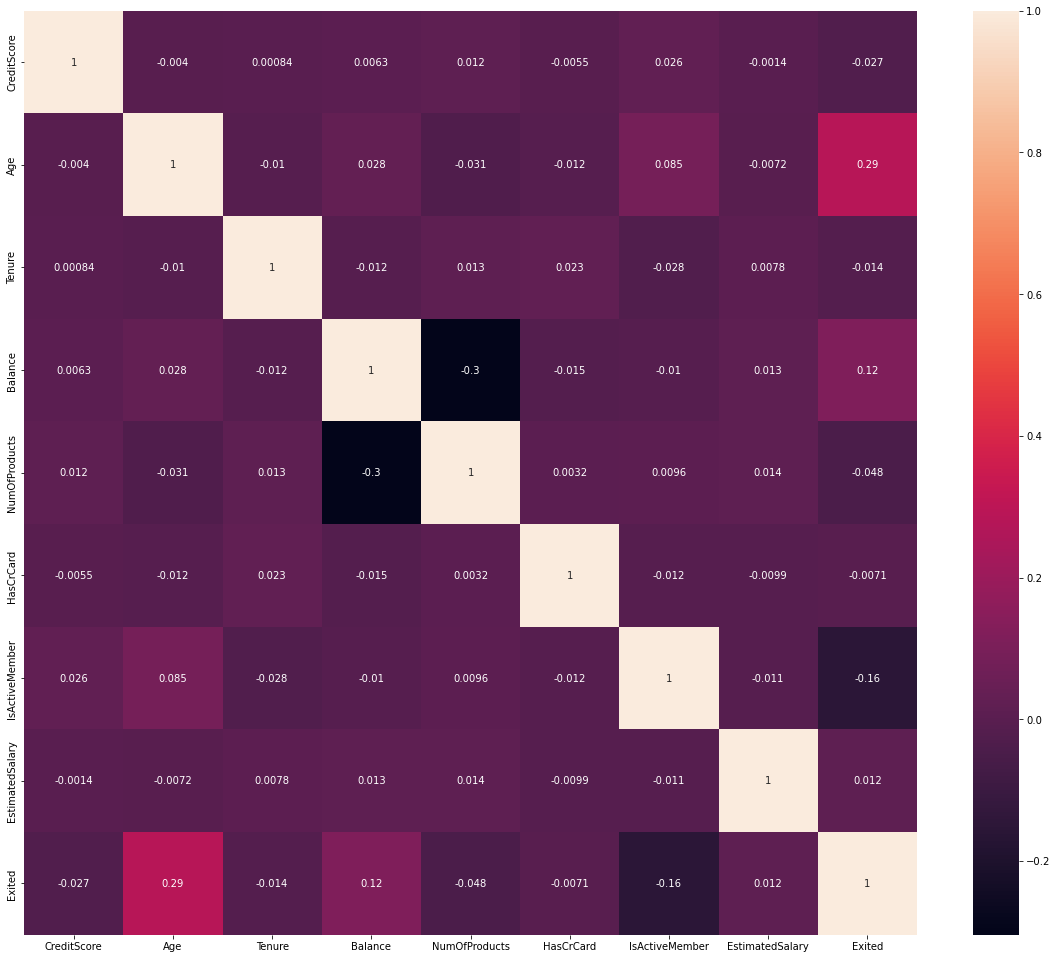

In [15]:
plt.figure(figsize=(20, 17))
sns.heatmap(dataset.corr(), annot=True);

**From the information we've learned about our dataset, we have to deal with the following challenges:**

* We need to transform all categorical attributes into numerical so that models can mostly work only with numerical inputs.
* The target variable "Exited" is highly unbalanced, it needs to be balanced in order to be able to implement various machine learning models with fair results.
* There is no multicolinearity present in data


## Some Countplot

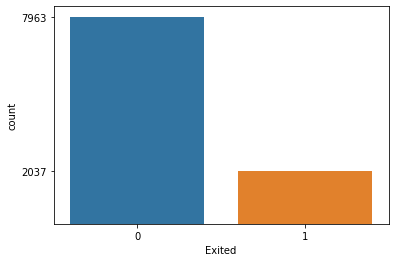

In [16]:
dataset['Gender'].value_counts()
dataset['Geography'].value_counts()

sns.countplot(data= dataset, x = 'Exited')
y = dataset['Exited'].value_counts()
plt.yticks(y)
plt.show()

#### There are 79 % customer churnout.

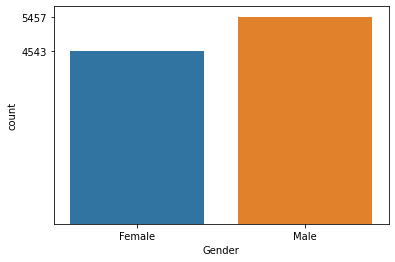

In [17]:
sns.countplot(data= dataset, x = 'Gender')
y = dataset['Gender'].value_counts()
plt.yticks(y)
plt.show()

#### There are 54.57% Males and 45.43% females

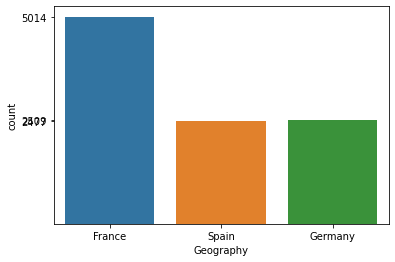

In [18]:
sns.countplot(data= dataset, x = 'Geography')
y = dataset['Geography'].value_counts()
plt.yticks(y)
plt.show()

#### About 50.14% customers are from France, 25.09% from Spain and 24.77% from germany

**We have already come to some conclusions regarding features:**

* Geography attribute shows that in Germany, one third of all clients decided to leave the bank.
* Gender attribute shows that 1/4 of female clients tend to choose another bank as to 1/5 of male clients.
* Results of tenure attribute seems to be similarly low in first and tenth year and similarly high between second and ninth year.
* NumOfProducts attribute shows us that vast majority of clients owns one or two products and clients with more than 3 products do not leave the bank whereas almost 1/3 of clients with only one product left the bank.
* HasCrCard attribute has similar results of target variable for both owners of the credit card and not-owners (3/4 to 1/4 distribution for target variable in this attrbiute HasCrCard).
* For attribute IsActiveMember only every fifth active member left the company whereas more than 1/4 of non-active clients left the company. We are unable to tell what exactly this attribute means since it was not explained in the dataset description.
* Age attribute tells us that clients who are older tend to leave the bank more often than their younger parts.
* Since results of target variable for CreditScore and EstimatedSalary are very similar to each other, it is impossible based on this chart to tell, which customer will likely churn and which not.
* Clients with higher balance on their bank accounts tend to leave the bank more often.

# Transformation of categorical attributes**

📌  First of all, let's transform categorical attributes into numerical using OneHotEncoder (.get_dummies ()) function in order to be able to provide these attributes as input for machine learning models. You may wonder why I've chosen OneHotEncoder while I could've used LabelEncoder as well. The reason lies in the nature of the attributes I am working with. Since both Geography and Gender have only few categories (Spain, France, Germany; Male, Female) and the order of these categories does not matter, it is more appropriate to use OneHotEncoder function. If there would be a lot of categories inside every attribute and we would decide to use OneHotEncoder, we would have to face curse-dimensionality problem and deal with it appropriately.

In [19]:
#encoding categorical attributes using .get_dummies() function
dataset = pd.get_dummies(data = dataset, columns = ['Geography', 'Gender'])
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


# Balancing the target variable**

📌 All done, now we can advance to the imbalanced target variable we have to deal with. We will use oversampling strategy using the RandomOverSampler class, thus we will generate same numbers of rows for the value 1 of target variable Exited, therefore we will get the same number of rows for both values of target variable. If we would not dealt with the imbalanced target variable, machine learning models would then prefer value 0 over 1.

In [20]:
X = dataset.drop('Exited',axis=1)
Y = dataset['Exited']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

X_train =  ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [25]:
X_train.shape

(7000, 13)

In [26]:
X_test.shape

(3000, 13)

In [27]:
Y_train.value_counts()

0    5590
1    1410
Name: Exited, dtype: int64

Here we see that data in Y_train are unbalanced because we train more of 0 sample as compare to 1

# RandomOverSampler 

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train1, Y_train1 = ros.fit_resample(X_train,Y_train)
X_train.shape, Y_train.shape

((7000, 13), (7000,))

In [29]:
Y_test.value_counts()

0    2373
1     627
Name: Exited, dtype: int64

In [30]:
X_test1, Y_test1 = ros.fit_resample(X_test,Y_test)

In [31]:
Y_test1.value_counts()

0    2373
1    2373
Name: Exited, dtype: int64

In [32]:
# Create Model Function
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred = model.predict(X_test1)
    
    print(classification_report(Y_test1, Y_pred))
    
    print(confusion_matrix(Y_test1,Y_pred))
    return model

from sklearn.metrics import classification_report,confusion_matrix

We base evaluation of ML classification models on performance measurement technique, confusion matrix. With this method, we can compute useful metrics to evaluate our models, such as accuracy, precision, recall and F-score.
* **Accuracy**: Is the fraction of predictions our model got right.

$$ Accuracy = \frac {Number_of Correct Predictions} { {Total Number_of Predictions} } = \frac {TP+FN} { {TP+FP+TN+FN} } $$

* **Precision**: It is a ratio of **correct positive predictions to the total predicted positives**. In other words, of all the positive classes predicted, what percentage is truly positive.

$$ Precision (P) = \frac {TP} { {TP+FP} } $$

* **Recall/Sensitivity**: The ratio of **correct positive predictions to the total positives examples**.

$$ Recall (R) = \frac {TP} { {TP+FN} } $$

* **F-Score**: Weighted average score of the recall and precision.

$$ F-Score = \frac {2PR} { {(P+R)} } $$

**Interpretation of Confusion matrix in our context:**
* TP = client exited the company as predicted
* FP = client was predicted to exit but stayed instead
* TN = client stayed as predicted
* FN = client was predicted to stay but exited instead (worst scenario)

**Based on the importance of FN value in our case, we will pay special attention to recall metric than precision.**

# 1- Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      2373
           1       0.72      0.67      0.69      2373

    accuracy                           0.70      4746
   macro avg       0.70      0.70      0.70      4746
weighted avg       0.70      0.70      0.70      4746

[[1740  633]
 [ 775 1598]]


# 2- Decision Tree Classifier with Gini

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.63      0.88      0.74      2373
           1       0.80      0.49      0.61      2373

    accuracy                           0.69      4746
   macro avg       0.72      0.69      0.67      4746
weighted avg       0.72      0.69      0.67      4746

[[2087  286]
 [1208 1165]]


**Decision Tree**

We will go step by step by all possible parameters of Decision Tree function:
* criterion : This parameter works as attribute selection measure. Default parameter is "gini" (for Gini index) and the other possibility is "entropy" for the information gain.

* splitter : This parameter allows us to choose the split strategy. Default parameter is "best" (for best split) and the other possibility is "random” to choose the best random split.

* max_depth : The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

# 2.1 Decision Tree Classifier : Pruning Technique : max_depth

In [35]:
for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dt1=create_model(dt1)

max depth :  1
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2373
           1       0.73      0.67      0.70      2373

    accuracy                           0.71      4746
   macro avg       0.71      0.71      0.71      4746
weighted avg       0.71      0.71      0.71      4746

[[1792  581]
 [ 792 1581]]
max depth :  2
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2373
           1       0.74      0.71      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1783  590]
 [ 693 1680]]
max depth :  3
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2373
           1       0.74      0.71      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      

#### Here we see that depth 5 gives good recall. So we take max depth 5. 

In [36]:
dt1 = DecisionTreeClassifier(random_state=1, max_depth=5)

dt1 =create_model(dt1)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2373
           1       0.77      0.76      0.76      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1822  551]
 [ 570 1803]]


# 2.2 Decision Tree Classifier : Pruning Technique :min_samples_leaf

In [37]:
for i in range(45,101,1):
    df2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=i)
    print("min smaple leaf: ", i)
    
    df2 = create_model(df2)
    print("<------------------------------------------------------>")

min smaple leaf:  45
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1902  471]
 [ 658 1715]]
<------------------------------------------------------>
min smaple leaf:  46
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1896  477]
 [ 669 1704]]
<------------------------------------------------------>
min smaple leaf:  47
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      2373
      

[[1908  465]
 [ 631 1742]]
<------------------------------------------------------>
min smaple leaf:  65
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2373
           1       0.80      0.72      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1934  439]
 [ 657 1716]]
<------------------------------------------------------>
min smaple leaf:  66
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2373
           1       0.80      0.72      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1934  439]
 [ 657 1716]]
<------------------------------------------------------>
min smaple leaf:  67
              precision    reca

[[1887  486]
 [ 626 1747]]
<------------------------------------------------------>
min smaple leaf:  84
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      2373
           1       0.78      0.74      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1888  485]
 [ 626 1747]]
<------------------------------------------------------>
min smaple leaf:  85
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2373
           1       0.78      0.74      0.76      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.76      4746
weighted avg       0.77      0.76      0.76      4746

[[1873  500]
 [ 617 1756]]
<------------------------------------------------------>
min smaple leaf:  86
              precision    reca

In [38]:
df2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=90)

df2 = create_model(df2)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2373
           1       0.77      0.74      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1850  523]
 [ 617 1756]]


# 3 Decision Tree Classifier with Entropy

In [39]:
dt_entropy = DecisionTreeClassifier(random_state=1, criterion='entropy')   

# Criterion should be entropy if you want to calculate with Entropy other wise by default it take Gini Index

dt_entropy = create_model(dt_entropy)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74      2373
           1       0.80      0.51      0.62      2373

    accuracy                           0.69      4746
   macro avg       0.72      0.69      0.68      4746
weighted avg       0.72      0.69      0.68      4746

[[2068  305]
 [1169 1204]]


# 3.1 Decision Tree Classifier with Entropy : max_depth

In [40]:
for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy') #bydefault gini
    print("max depth : ",i)
    #call function 
    dt_entropy1=create_model(dt_entropy1)

max depth :  1
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2373
           1       0.73      0.67      0.70      2373

    accuracy                           0.71      4746
   macro avg       0.71      0.71      0.71      4746
weighted avg       0.71      0.71      0.71      4746

[[1792  581]
 [ 792 1581]]
max depth :  2
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2373
           1       0.74      0.71      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1783  590]
 [ 693 1680]]
max depth :  3
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2373
           1       0.74      0.71      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      

In [41]:
# Above we see that we get good recall at 4
dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=4,criterion='entropy') #bydefault gini

dt_entropy1=create_model(dt_entropy1)

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2373
           1       0.76      0.75      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1812  561]
 [ 595 1778]]


# 3.2 Decision Tree Classifier with Entropy : min_sample_leaf

In [42]:
for i in range(45,101,1):
    df2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=i,criterion='entropy')
    print("min smaple leaf: ", i)
    
    df2 = create_model(df2)
    print("<------------------------------------------------------>")

min smaple leaf:  45
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1892  481]
 [ 655 1718]]
<------------------------------------------------------>
min smaple leaf:  46
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1889  484]
 [ 668 1705]]
<------------------------------------------------------>
min smaple leaf:  47
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
      

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2373
           1       0.79      0.73      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1922  451]
 [ 629 1744]]
<------------------------------------------------------>
min smaple leaf:  65
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2373
           1       0.80      0.73      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.78      0.77      0.77      4746
weighted avg       0.78      0.77      0.77      4746

[[1949  424]
 [ 646 1727]]
<------------------------------------------------------>
min smaple leaf:  66
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      2373
           1       0.80    

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      2373
           1       0.79      0.72      0.75      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.76      4746
weighted avg       0.77      0.77      0.76      4746

[[1925  448]
 [ 665 1708]]
<------------------------------------------------------>
min smaple leaf:  84
              precision    recall  f1-score   support

           0       0.74      0.81      0.78      2373
           1       0.79      0.72      0.75      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1926  447]
 [ 665 1708]]
<------------------------------------------------------>
min smaple leaf:  85
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      2373
           1       0.79    

In [43]:
df2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=91,criterion='entropy')

df2 = create_model(df2)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2373
           1       0.77      0.75      0.76      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1840  533]
 [ 599 1774]]


# 4. Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc =RandomForestClassifier(random_state=1)
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.66      0.94      0.78      2373
           1       0.90      0.53      0.66      2373

    accuracy                           0.73      4746
   macro avg       0.78      0.73      0.72      4746
weighted avg       0.78      0.73      0.72      4746

[[2228  145]
 [1127 1246]]


In [49]:
for i in range(1,9):
    rfc1 = RandomForestClassifier(random_state=1, max_depth=i)
    print("Max_depth: ", i)
    
    rfc1  = create_model(rfc1)

Max_depth:  1
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      2373
           1       0.75      0.70      0.73      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1811  562]
 [ 703 1670]]
Max_depth:  2
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2373
           1       0.78      0.70      0.74      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.75      4746
weighted avg       0.76      0.75      0.75      4746

[[1912  461]
 [ 704 1669]]
Max_depth:  3
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2373
           1       0.79      0.73      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.7

In [50]:
rfc1 = RandomForestClassifier(random_state=1, max_depth=3)
    
rfc1  = create_model(rfc1)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2373
           1       0.79      0.73      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1915  458]
 [ 641 1732]]


# 5. AdaBoostClassifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier

In [52]:
for i in range(1,14):
    ada = AdaBoostClassifier(n_estimators=i, random_state=1)
    
    print("No of Decision Stump: ", i)
    
    ada = create_model(ada)

No of Decision Stump:  1
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      2373
           1       0.73      0.67      0.70      2373

    accuracy                           0.71      4746
   macro avg       0.71      0.71      0.71      4746
weighted avg       0.71      0.71      0.71      4746

[[1792  581]
 [ 792 1581]]
No of Decision Stump:  2
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2373
           1       0.74      0.71      0.72      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1783  590]
 [ 693 1680]]
No of Decision Stump:  3
              precision    recall  f1-score   support

           0       0.69      0.88      0.77      2373
           1       0.84      0.60      0.70      2373

    accuracy                           0.74      4746

In [53]:
ada = AdaBoostClassifier(n_estimators=4, random_state=1)


ada = create_model(ada)
# n_estimators means how many decision stump, decision stump deend on the no of input.... here input = 13

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      2373
           1       0.71      0.78      0.74      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1597  776]
 [ 513 1860]]


# 5. Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
for i in range(10,101):
    gbc = GradientBoostingClassifier(n_estimators=i, random_state=1)  # n_estimators >=10 and <=100
    print("Esimators: ", i)
    
    gbc = create_model(gbc)
    

Esimators:  10
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2373
           1       0.79      0.70      0.74      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1938  435]
 [ 718 1655]]
Esimators:  11
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2373
           1       0.76      0.75      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1824  549]
 [ 603 1770]]
Esimators:  12
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2373
           1       0.76      0.74      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      

              precision    recall  f1-score   support

           0       0.76      0.82      0.78      2373
           1       0.80      0.74      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78      4746
weighted avg       0.78      0.78      0.78      4746

[[1938  435]
 [ 627 1746]]
Esimators:  34
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2373
           1       0.80      0.74      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78      4746
weighted avg       0.78      0.78      0.78      4746

[[1933  440]
 [ 625 1748]]
Esimators:  35
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2373
           1       0.80      0.74      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78 

              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2373
           1       0.80      0.73      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78      4746
weighted avg       0.78      0.78      0.78      4746

[[1946  427]
 [ 633 1740]]
Esimators:  57
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2373
           1       0.80      0.73      0.76      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.77      4746
weighted avg       0.78      0.78      0.77      4746

[[1950  423]
 [ 644 1729]]
Esimators:  58
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2373
           1       0.80      0.73      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78 

              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2373
           1       0.80      0.73      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78      4746
weighted avg       0.78      0.78      0.78      4746

[[1948  425]
 [ 639 1734]]
Esimators:  80
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2373
           1       0.80      0.73      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78      4746
weighted avg       0.78      0.78      0.78      4746

[[1948  425]
 [ 639 1734]]
Esimators:  81
              precision    recall  f1-score   support

           0       0.75      0.82      0.79      2373
           1       0.80      0.73      0.77      2373

    accuracy                           0.78      4746
   macro avg       0.78      0.78      0.78 

In [56]:
# here n_estimators 11 is perfect

gbc = GradientBoostingClassifier(n_estimators=15, random_state=1)
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2373
           1       0.77      0.75      0.76      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1836  537]
 [ 601 1772]]


# 6. XGBClassifier

In [57]:
from xgboost import XGBClassifier

In [58]:
for i in range(10,100):
    xgc = XGBClassifier(n_estimators= i,reg_alpha =1, random_state =1)
    
    xgc = create_model(xgc)

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2373
           1       0.81      0.71      0.75      2373

    accuracy                           0.77      4746
   macro avg       0.78      0.77      0.77      4746
weighted avg       0.78      0.77      0.77      4746

[[1980  393]
 [ 696 1677]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.79      2373
           1       0.81      0.71      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.78      0.77      0.77      4746
weighted avg       0.78      0.77      0.77      4746

[[1980  393]
 [ 681 1692]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.79      2373
           1       0.81      0.71      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.78      0.77      0.77      4746
weighted avg       0

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      2373
           1       0.81      0.68      0.74      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.76      4746
weighted avg       0.77      0.76      0.76      4746

[[2005  368]
 [ 763 1610]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2373
           1       0.82      0.68      0.74      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.76      4746
weighted avg       0.77      0.76      0.76      4746

[[2013  360]
 [ 764 1609]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2373
           1       0.82      0.68      0.74      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.76      4746
weighted avg       0

              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2373
           1       0.83      0.65      0.73      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.75      4746
weighted avg       0.77      0.76      0.75      4746

[[2055  318]
 [ 841 1532]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2373
           1       0.83      0.64      0.72      2373

    accuracy                           0.76      4746
   macro avg       0.77      0.76      0.75      4746
weighted avg       0.77      0.76      0.75      4746

[[2056  317]
 [ 845 1528]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2373
           1       0.83      0.64      0.72      2373

    accuracy                           0.75      4746
   macro avg       0.77      0.75      0.75      4746
weighted avg       0

              precision    recall  f1-score   support

           0       0.69      0.88      0.78      2373
           1       0.84      0.61      0.71      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.74      4746
weighted avg       0.76      0.75      0.74      4746

[[2087  286]
 [ 921 1452]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      2373
           1       0.83      0.61      0.71      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.74      4746
weighted avg       0.76      0.75      0.74      4746

[[2085  288]
 [ 920 1453]]
              precision    recall  f1-score   support

           0       0.69      0.88      0.78      2373
           1       0.83      0.61      0.71      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.74      4746
weighted avg       0

In [59]:
xgc = XGBClassifier(n_estimators= 10,reg_alpha =1, random_state =1)

xgc = create_model(xgc)

'''reg_alpha mean regularization and alpa means lambda means hyperparameter 
if re_aplpha  =1 , 1 means True means autometic handel outlier and overfitting
'''

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2373
           1       0.81      0.71      0.75      2373

    accuracy                           0.77      4746
   macro avg       0.78      0.77      0.77      4746
weighted avg       0.78      0.77      0.77      4746

[[1980  393]
 [ 696 1677]]


'reg_alpha mean regularization and alpa means lambda means hyperparameter \nif re_aplpha  =1 , 1 means True means autometic handel outlier and overfitting\n'

# 7. Linear SVC

In [60]:
from sklearn.svm import LinearSVC

In [61]:
svc = LinearSVC(random_state=1)

svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2373
           1       0.72      0.68      0.70      2373

    accuracy                           0.71      4746
   macro avg       0.71      0.71      0.71      4746
weighted avg       0.71      0.71      0.71      4746

[[1746  627]
 [ 770 1603]]


In [64]:
from sklearn.svm import SVC

In [65]:
poly_svc = SVC(random_state=1,kernel='poly')

In [66]:
poly_svc = create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.74      0.81      0.78      2373
           1       0.79      0.72      0.75      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1928  445]
 [ 665 1708]]


In [67]:
r_svc = SVC(random_state=1, kernel='rbf')

In [68]:
r_svc = create_model(r_svc)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2373
           1       0.79      0.70      0.74      2373

    accuracy                           0.75      4746
   macro avg       0.76      0.75      0.75      4746
weighted avg       0.76      0.75      0.75      4746

[[1919  454]
 [ 715 1658]]


# Results evaluation

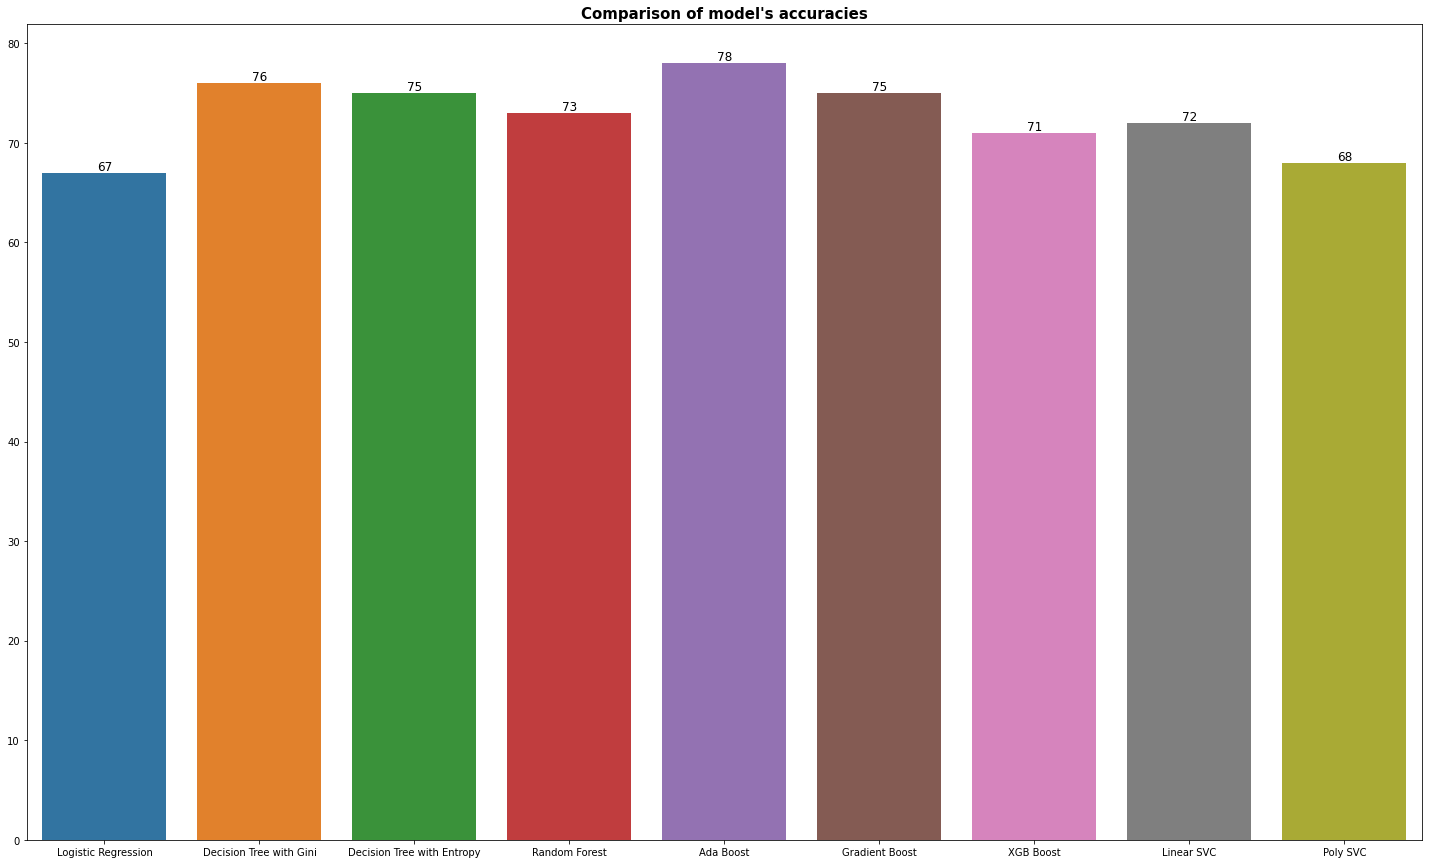

In [4]:
#model's accuracy evaluation in barplot
'''olympic_medals_palette = ['#BBA14F','#BBC2CC', '#D37731', '#B87333', '#B87333']
olympic_medals_edge_colors = ['#BD9A3B','#AEC3D1', '#D66D20', '#B87333', '#B87333']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
'''
plt.figure(figsize = (25,15))
ax = sns.barplot(x = ['Logistic Regression', 'Decision Tree with Gini', 'Decision Tree with Entropy', 'Random Forest',
                     'Ada Boost', 'Gradient Boost', 'XGB Boost', 'Linear SVC', 'Poly SVC'], y = [67,76,75,73,78,75,71,72,68])
plt.title(label = "Comparison of model's accuracies", fontsize = 15, fontweight = 'bold', fontname = 'Helvetica', ha = 'center')
ax.bar_label(ax.containers[0], label_type = 'edge', fontsize = 12)

plt.show()